## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 1.0068495	total: 69.3ms	remaining: 1m 9s
1:	learn: 0.9883330	total: 70.1ms	remaining: 35s
2:	learn: 0.9674508	total: 71ms	remaining: 23.6s
3:	learn: 0.9513236	total: 72ms	remaining: 17.9s
4:	learn: 0.9333540	total: 73ms	remaining: 14.5s
5:	learn: 0.9169176	total: 73.9ms	remaining: 12.2s
6:	learn: 0.9002152	total: 74.8ms	remaining: 10.6s
7:	learn: 0.8835312	total: 75.7ms	remaining: 9.39s
8:	learn: 0.8672345	total: 76.7ms	remaining: 8.44s
9:	learn: 0.8513682	total: 77.6ms	remaining: 7.69s
10:	learn: 0.8351256	total: 78.6ms	remaining: 7.06s
11:	learn: 0.8196117	total: 79.5ms	remaining: 6.54s
12:	learn: 0.8042748	total: 80.4ms	remaining: 6.1s
13:	learn: 0.7890218	total: 81.2ms	remaining: 5.72s
14:	learn: 0.7756736	total: 82.1ms	remaining: 5.39s
15:	learn: 0.7616099	total: 83ms	remaining: 5.1s
16:	learn: 0.7494175	total: 83.9ms	remaining: 4.85s
17:	learn: 0.7363999	total: 84.8ms	remaining: 4.62s
18:	learn: 0.7232258	total: 85.5ms	remaining: 4.42s
19:	

46:	learn: 0.4857688	total: 109ms	remaining: 2.2s
47:	learn: 0.4791091	total: 110ms	remaining: 2.17s
48:	learn: 0.4737373	total: 111ms	remaining: 2.15s
49:	learn: 0.4680342	total: 111ms	remaining: 2.12s
50:	learn: 0.4633969	total: 112ms	remaining: 2.09s
51:	learn: 0.4586522	total: 113ms	remaining: 2.06s
52:	learn: 0.4537051	total: 114ms	remaining: 2.03s
53:	learn: 0.4502723	total: 115ms	remaining: 2.01s
54:	learn: 0.4454900	total: 116ms	remaining: 1.99s
55:	learn: 0.4406400	total: 117ms	remaining: 1.97s
56:	learn: 0.4361472	total: 117ms	remaining: 1.94s
57:	learn: 0.4314721	total: 118ms	remaining: 1.92s
58:	learn: 0.4279987	total: 119ms	remaining: 1.9s
59:	learn: 0.4240200	total: 120ms	remaining: 1.88s
60:	learn: 0.4195431	total: 121ms	remaining: 1.86s
61:	learn: 0.4148372	total: 122ms	remaining: 1.84s
62:	learn: 0.4117572	total: 122ms	remaining: 1.82s
63:	learn: 0.4081778	total: 123ms	remaining: 1.8s
64:	learn: 0.4049306	total: 124ms	remaining: 1.78s
65:	learn: 0.4017826	total: 125ms	

146:	learn: 0.2595106	total: 192ms	remaining: 1.11s
147:	learn: 0.2589324	total: 193ms	remaining: 1.11s
148:	learn: 0.2576475	total: 194ms	remaining: 1.1s
149:	learn: 0.2571536	total: 194ms	remaining: 1.1s
150:	learn: 0.2562621	total: 195ms	remaining: 1.1s
151:	learn: 0.2553826	total: 196ms	remaining: 1.09s
152:	learn: 0.2547548	total: 197ms	remaining: 1.09s
153:	learn: 0.2538895	total: 197ms	remaining: 1.08s
154:	learn: 0.2528955	total: 198ms	remaining: 1.08s
155:	learn: 0.2520886	total: 199ms	remaining: 1.08s
156:	learn: 0.2508735	total: 200ms	remaining: 1.07s
157:	learn: 0.2499249	total: 201ms	remaining: 1.07s
158:	learn: 0.2487601	total: 201ms	remaining: 1.06s
159:	learn: 0.2480521	total: 202ms	remaining: 1.06s
160:	learn: 0.2471348	total: 203ms	remaining: 1.06s
161:	learn: 0.2458660	total: 204ms	remaining: 1.05s
162:	learn: 0.2453100	total: 204ms	remaining: 1.05s
163:	learn: 0.2444850	total: 205ms	remaining: 1.04s
164:	learn: 0.2440236	total: 206ms	remaining: 1.04s
165:	learn: 0.2

279:	learn: 0.1894874	total: 299ms	remaining: 770ms
280:	learn: 0.1892331	total: 300ms	remaining: 769ms
281:	learn: 0.1885826	total: 301ms	remaining: 767ms
282:	learn: 0.1884225	total: 302ms	remaining: 766ms
283:	learn: 0.1882164	total: 303ms	remaining: 764ms
284:	learn: 0.1877316	total: 304ms	remaining: 762ms
285:	learn: 0.1872088	total: 305ms	remaining: 761ms
286:	learn: 0.1871230	total: 306ms	remaining: 760ms
287:	learn: 0.1866607	total: 307ms	remaining: 758ms
288:	learn: 0.1865200	total: 307ms	remaining: 756ms
289:	learn: 0.1859847	total: 308ms	remaining: 754ms
290:	learn: 0.1857676	total: 309ms	remaining: 753ms
291:	learn: 0.1852655	total: 310ms	remaining: 751ms
292:	learn: 0.1851882	total: 311ms	remaining: 749ms
293:	learn: 0.1850485	total: 311ms	remaining: 748ms
294:	learn: 0.1849587	total: 312ms	remaining: 746ms
295:	learn: 0.1848740	total: 313ms	remaining: 744ms
296:	learn: 0.1844288	total: 314ms	remaining: 743ms
297:	learn: 0.1839490	total: 315ms	remaining: 741ms
298:	learn: 

376:	learn: 0.1547586	total: 383ms	remaining: 633ms
377:	learn: 0.1543440	total: 384ms	remaining: 632ms
378:	learn: 0.1541605	total: 385ms	remaining: 630ms
379:	learn: 0.1537498	total: 385ms	remaining: 629ms
380:	learn: 0.1535171	total: 386ms	remaining: 627ms
381:	learn: 0.1533101	total: 387ms	remaining: 626ms
382:	learn: 0.1530455	total: 388ms	remaining: 624ms
383:	learn: 0.1527396	total: 388ms	remaining: 623ms
384:	learn: 0.1523877	total: 389ms	remaining: 622ms
385:	learn: 0.1520373	total: 390ms	remaining: 620ms
386:	learn: 0.1517813	total: 391ms	remaining: 619ms
387:	learn: 0.1515104	total: 392ms	remaining: 618ms
388:	learn: 0.1511148	total: 392ms	remaining: 616ms
389:	learn: 0.1508298	total: 394ms	remaining: 616ms
390:	learn: 0.1506115	total: 395ms	remaining: 615ms
391:	learn: 0.1502895	total: 396ms	remaining: 614ms
392:	learn: 0.1500663	total: 396ms	remaining: 612ms
393:	learn: 0.1498365	total: 397ms	remaining: 611ms
394:	learn: 0.1494675	total: 398ms	remaining: 610ms
395:	learn: 

506:	learn: 0.1212276	total: 490ms	remaining: 477ms
507:	learn: 0.1211873	total: 491ms	remaining: 476ms
508:	learn: 0.1209960	total: 492ms	remaining: 475ms
509:	learn: 0.1209048	total: 493ms	remaining: 473ms
510:	learn: 0.1206274	total: 494ms	remaining: 472ms
511:	learn: 0.1205044	total: 494ms	remaining: 471ms
512:	learn: 0.1204606	total: 495ms	remaining: 470ms
513:	learn: 0.1201792	total: 496ms	remaining: 469ms
514:	learn: 0.1199872	total: 497ms	remaining: 468ms
515:	learn: 0.1198610	total: 498ms	remaining: 467ms
516:	learn: 0.1196974	total: 499ms	remaining: 466ms
517:	learn: 0.1195552	total: 500ms	remaining: 465ms
518:	learn: 0.1193415	total: 500ms	remaining: 464ms
519:	learn: 0.1190057	total: 501ms	remaining: 463ms
520:	learn: 0.1187504	total: 502ms	remaining: 462ms
521:	learn: 0.1184082	total: 503ms	remaining: 460ms
522:	learn: 0.1181382	total: 504ms	remaining: 459ms
523:	learn: 0.1179973	total: 505ms	remaining: 458ms
524:	learn: 0.1177341	total: 505ms	remaining: 457ms
525:	learn: 

609:	learn: 0.1026212	total: 574ms	remaining: 367ms
610:	learn: 0.1024849	total: 574ms	remaining: 366ms
611:	learn: 0.1022972	total: 575ms	remaining: 365ms
612:	learn: 0.1020954	total: 576ms	remaining: 364ms
613:	learn: 0.1018741	total: 577ms	remaining: 363ms
614:	learn: 0.1017419	total: 578ms	remaining: 362ms
615:	learn: 0.1016161	total: 578ms	remaining: 361ms
616:	learn: 0.1014409	total: 579ms	remaining: 359ms
617:	learn: 0.1012937	total: 580ms	remaining: 358ms
618:	learn: 0.1012549	total: 581ms	remaining: 357ms
619:	learn: 0.1011969	total: 582ms	remaining: 356ms
620:	learn: 0.1011322	total: 582ms	remaining: 355ms
621:	learn: 0.1009603	total: 583ms	remaining: 354ms
622:	learn: 0.1007114	total: 584ms	remaining: 353ms
623:	learn: 0.1005486	total: 585ms	remaining: 352ms
624:	learn: 0.1002601	total: 586ms	remaining: 351ms
625:	learn: 0.1000446	total: 586ms	remaining: 350ms
626:	learn: 0.0998846	total: 587ms	remaining: 349ms
627:	learn: 0.0996119	total: 588ms	remaining: 348ms
628:	learn: 

737:	learn: 0.0848584	total: 681ms	remaining: 242ms
738:	learn: 0.0847368	total: 682ms	remaining: 241ms
739:	learn: 0.0846341	total: 683ms	remaining: 240ms
740:	learn: 0.0845418	total: 683ms	remaining: 239ms
741:	learn: 0.0844597	total: 684ms	remaining: 238ms
742:	learn: 0.0843395	total: 685ms	remaining: 237ms
743:	learn: 0.0842477	total: 686ms	remaining: 236ms
744:	learn: 0.0841609	total: 687ms	remaining: 235ms
745:	learn: 0.0840696	total: 687ms	remaining: 234ms
746:	learn: 0.0839868	total: 688ms	remaining: 233ms
747:	learn: 0.0837938	total: 689ms	remaining: 232ms
748:	learn: 0.0835791	total: 690ms	remaining: 231ms
749:	learn: 0.0835173	total: 691ms	remaining: 230ms
750:	learn: 0.0834608	total: 692ms	remaining: 229ms
751:	learn: 0.0833393	total: 692ms	remaining: 228ms
752:	learn: 0.0832703	total: 693ms	remaining: 227ms
753:	learn: 0.0831128	total: 694ms	remaining: 226ms
754:	learn: 0.0830335	total: 695ms	remaining: 226ms
755:	learn: 0.0829524	total: 696ms	remaining: 225ms
756:	learn: 

836:	learn: 0.0738785	total: 764ms	remaining: 149ms
837:	learn: 0.0737916	total: 765ms	remaining: 148ms
838:	learn: 0.0736858	total: 766ms	remaining: 147ms
839:	learn: 0.0735246	total: 767ms	remaining: 146ms
840:	learn: 0.0734766	total: 768ms	remaining: 145ms
841:	learn: 0.0734070	total: 769ms	remaining: 144ms
842:	learn: 0.0733509	total: 770ms	remaining: 143ms
843:	learn: 0.0732217	total: 771ms	remaining: 142ms
844:	learn: 0.0731302	total: 772ms	remaining: 142ms
845:	learn: 0.0729529	total: 773ms	remaining: 141ms
846:	learn: 0.0728007	total: 773ms	remaining: 140ms
847:	learn: 0.0727285	total: 774ms	remaining: 139ms
848:	learn: 0.0726513	total: 775ms	remaining: 138ms
849:	learn: 0.0724989	total: 776ms	remaining: 137ms
850:	learn: 0.0723320	total: 777ms	remaining: 136ms
851:	learn: 0.0722075	total: 778ms	remaining: 135ms
852:	learn: 0.0721813	total: 779ms	remaining: 134ms
853:	learn: 0.0721150	total: 780ms	remaining: 133ms
854:	learn: 0.0720936	total: 781ms	remaining: 132ms
855:	learn: 

965:	learn: 0.0617159	total: 872ms	remaining: 30.7ms
966:	learn: 0.0616381	total: 873ms	remaining: 29.8ms
967:	learn: 0.0615696	total: 874ms	remaining: 28.9ms
968:	learn: 0.0614852	total: 874ms	remaining: 28ms
969:	learn: 0.0614534	total: 875ms	remaining: 27.1ms
970:	learn: 0.0613865	total: 876ms	remaining: 26.2ms
971:	learn: 0.0612494	total: 877ms	remaining: 25.3ms
972:	learn: 0.0611892	total: 878ms	remaining: 24.4ms
973:	learn: 0.0611366	total: 878ms	remaining: 23.4ms
974:	learn: 0.0610409	total: 879ms	remaining: 22.5ms
975:	learn: 0.0609019	total: 880ms	remaining: 21.6ms
976:	learn: 0.0608131	total: 881ms	remaining: 20.7ms
977:	learn: 0.0607642	total: 882ms	remaining: 19.8ms
978:	learn: 0.0607115	total: 883ms	remaining: 18.9ms
979:	learn: 0.0606612	total: 884ms	remaining: 18ms
980:	learn: 0.0605781	total: 884ms	remaining: 17.1ms
981:	learn: 0.0605044	total: 885ms	remaining: 16.2ms
982:	learn: 0.0604069	total: 886ms	remaining: 15.3ms
983:	learn: 0.0603291	total: 887ms	remaining: 14.4

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

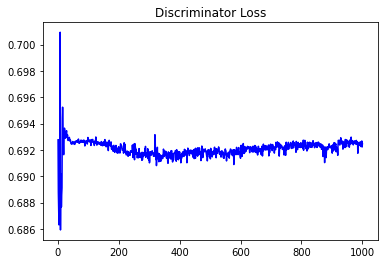

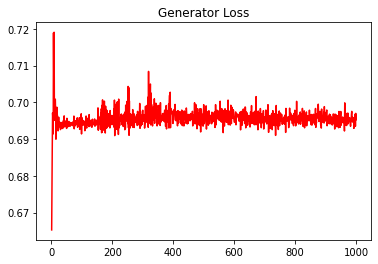

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1584997580744177


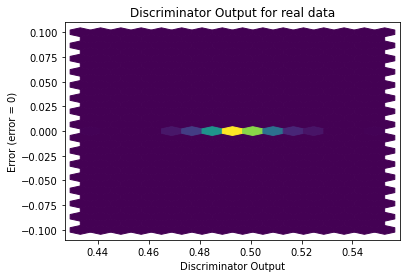

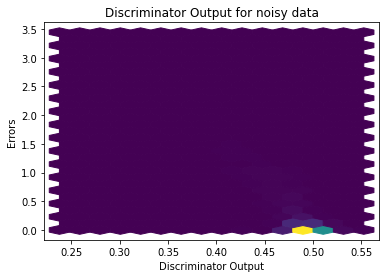

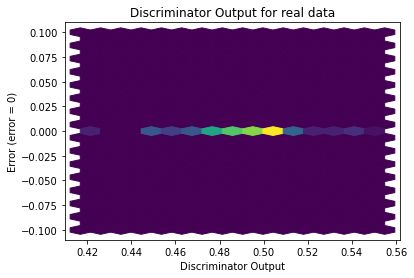

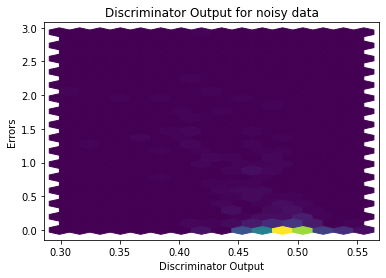

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


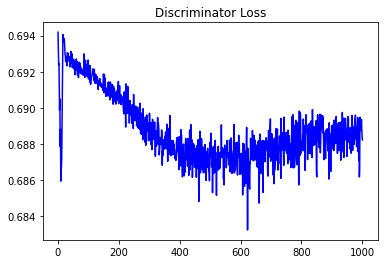

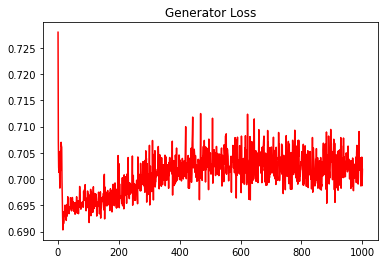

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10649448287060512


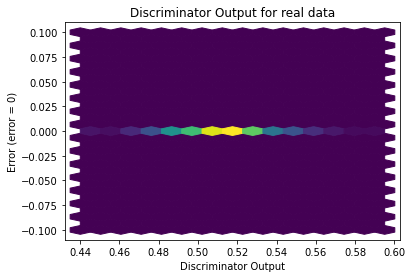

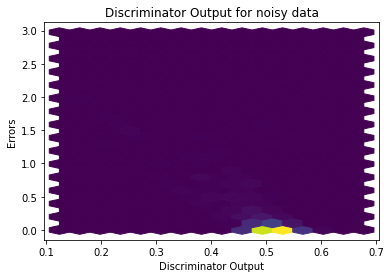

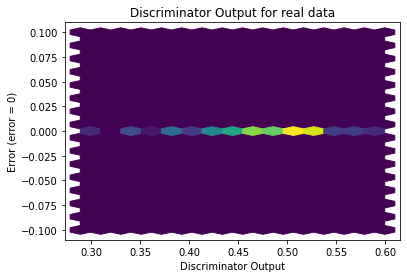

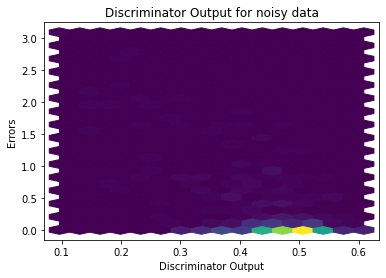

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6771]], requires_grad=True)
